<a href="https://colab.research.google.com/github/Dean-Clark27/Asteroids/blob/main/Dean_Clark_CSE_337_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1: Multi-armed Bandits

This lab explores the multi-armed bandit problem, where an agent must choose among multiple options (arms) with unknown reward distributions to maximize its cumulative reward over time.

In [2]:
# Dean Clark
# CSE 337  with Professor David Saldana
# dmc227@lehigh.edu
# 800049284
%pylab inline
from scipy.stats import norm

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Number of bandit arms
K = 5 # @param {"type":"integer"}
# Number of trials (time steps)
T = 100  # @param {"type":"integer"}
# Random seed
seed = 0

Text(0.5, 1.02, 'Unknown Reward Distributions for K Bandits')

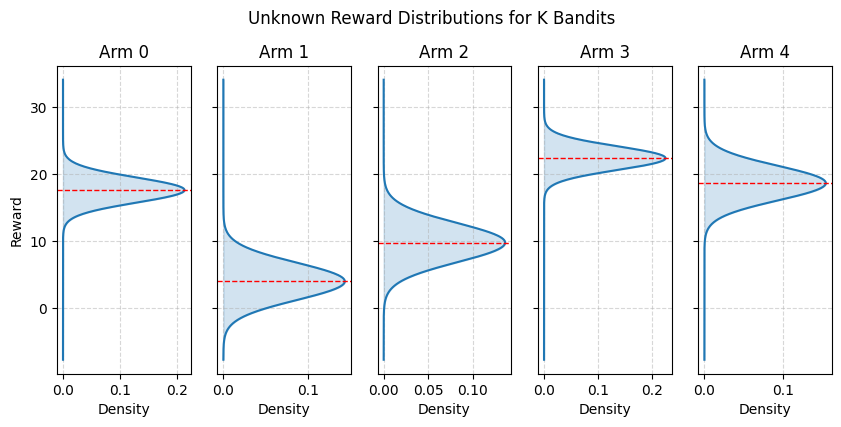

In [4]:
# Stattionary probability distribution for K bandits
np.random.seed(seed)
bandit_mean = 10 * np.random.normal(size=K)
bandit_std = np.random.uniform(1, 3, size=K)




###### Plot disttributions #######
fig, axes = plt.subplots(1, K, figsize=(2*K, 4), sharey=True)

x_min = bandit_mean.min() - 4 * bandit_std.max()
x_max = bandit_mean.max() + 4 * bandit_std.max()
x = np.linspace(x_min, x_max, 500)

for i, ax in enumerate(axes):
    y = norm.pdf(x, loc=bandit_mean[i], scale=bandit_std[i])
    ax.plot(y, x, color="C0")  # vertical orientation
    ax.fill_betweenx(x, 0, y, alpha=0.2, color="C0")
    ax.axhline(bandit_mean[i], color="r", linestyle="--", linewidth=1)  # mean
    ax.set_title(f"Arm {i}")
    ax.set_xlabel("Density")
    if i == 0:
        ax.set_ylabel("Reward")
    ax.grid(True, linestyle="--", alpha=0.5)
plt.suptitle("Unknown Reward Distributions for K Bandits", y=1.02)


Text(0, 0.5, 'Reward')

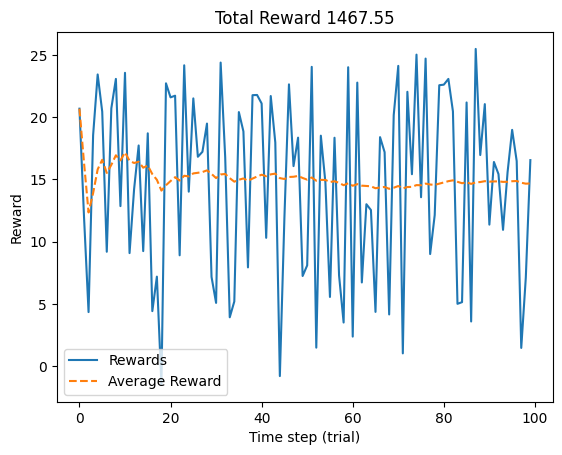

In [5]:
# Rewards
rewards = []

# For T trials, chose a random arm
for t in range(T):
  # Action: Choose a random arm
  a = np.random.randint(0, K-1)

  # Reward
  r = np.random.normal(bandit_mean[a], bandit_std[a])
  rewards.append(r)


# Total reward
total = sum(rewards)
avg_reward = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)

# Plot results
plot(rewards, label='Rewards')
plot(avg_reward, '--', label='Average Reward')
legend()
title("Rewards")
plt.title("Total Reward %.2f"%total)
xlabel("Time step (trial)")
ylabel("Reward")




## Exercise 1: Implement Your Own Bandit Policy

In the previous cells, we simulated a multi-armed bandit problem and observed the rewards obtained by choosing arms randomly. While this gives us a baseline, a random policy is unlikely to be the most effective way to maximize rewards.

Your task is to implement your own policy for selecting which bandit arm to pull at each time step `t`. The total reward should be higher than the

Text(0, 0.5, 'Reward')

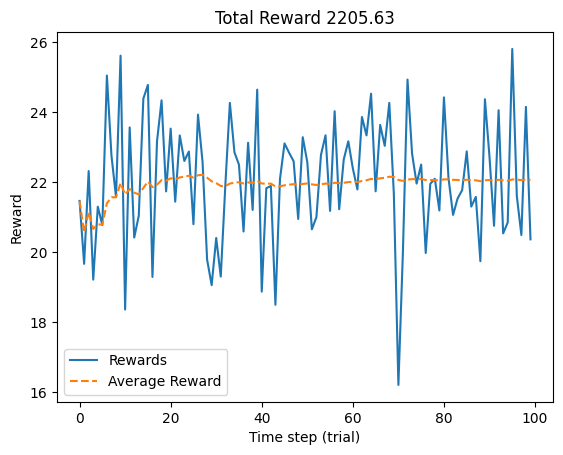

In [6]:
# Rewards
rewards = []

# For T trials, chose a random arm
for t in range(T):
  # Action: Choose one of the arms
  a = 3 ############################ YOUR POLICY HERE #################

  # Reward
  r = np.random.normal(bandit_mean[a], bandit_std[a])
  rewards.append(r)

# Total reward
total = sum(rewards)
avg_reward = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)

# Plot results
plot(rewards, label='Rewards')
plot(avg_reward, '--', label='Average Reward')
legend()
title("Rewards")
plt.title("Total Reward %.2f"%total)
xlabel("Time step (trial)")
ylabel("Reward")

## Exercise 2: Greedy strategy


1. Implement the greedy strategy: Always choose the arm with the highest estimated average reward.

2. Implement the Epsilon-greedy strategy: with a small probability epsilon, choose a random arm; otherwise, choose the greedy arm.

(Note: I did not do this, since it is optional)

3. [Optional for 337] Implement Thompson Sampling: Maintain a probability distribution over the expected reward for each arm and sample from these distributions to choose an arm.



Best arm: 3


Text(0, 0.5, 'Reward')

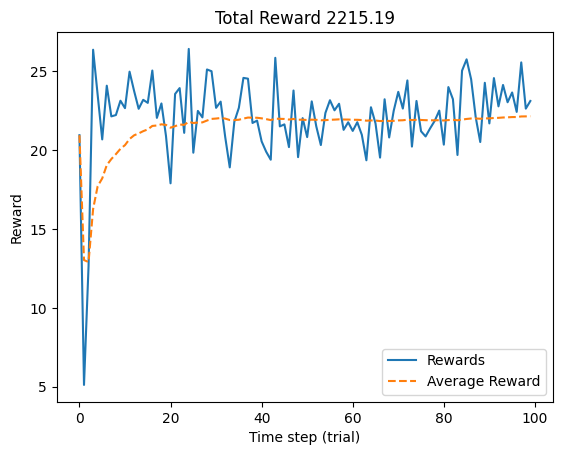

In [22]:
#greedy algorithm

np.random.seed(seed)

# Rewards
rewards = []
counts = np.zeros(K, dtype=int)
sums = np.zeros(K)
#Find best action from the first five trials


# For T trials, chose a random arm
for t in range(K):
  # Action: Choose best action found in first trials
  a = t
  reward = np.random.normal(bandit_mean[a], bandit_std[a])
  rewards.append(reward)
  counts[a] += 1
  sums[a] += reward

avg_rewards = sums / counts
best_a = np.argmax(avg_rewards)
print(f"Best arm: {best_a}")

# For T trials, chose a random arm
for t in range(K,T):
  # Action: Choose the best arm
  a = best_a
  # Reward
  r = np.random.normal(bandit_mean[a], bandit_std[a])
  counts[best_a] += 1
  sums[best_a] += r

  avg_rewards = sums / np.maximum(counts, 1) # avoids the average from dividing by 0
  updated_best = np.argmax(avg_rewards)
  if best_a != a:
    print(f"Best arm: {best_a}")
  rewards.append(r)

# Total reward
total = sum(rewards)
avg_reward = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)

# Plot results
plot(rewards, label='Rewards')
plot(avg_reward, '--', label='Average Reward')
legend()
title("Rewards")
plt.title("Total Reward %.2f"%total)
xlabel("Time step (trial)")
ylabel("Reward")

Text(0, 0.5, 'Reward')

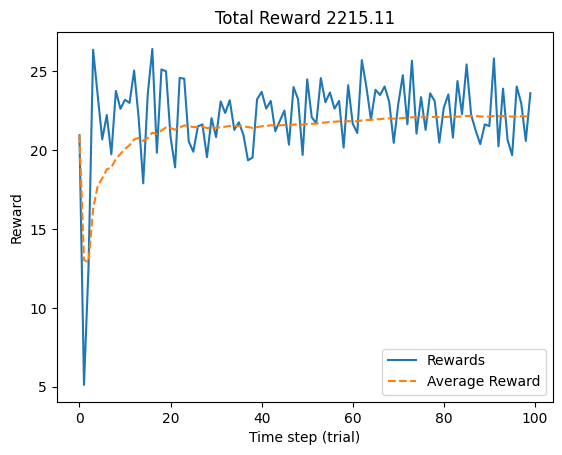

In [32]:
#epsilon-greedy algorithm

np.random.seed(seed)
# Rewards
rewards = []
counts = np.zeros(K, dtype=int)
sums = np.zeros(K)
epsilon = 0.001

# First K trials: play each arm once
for a in range(K):
    r = np.random.normal(bandit_mean[a], bandit_std[a])
    rewards.append(r)
    counts[a] += 1
    sums[a] += r

# Remaining trials to either choose random or best arm
for t in range(K, T):
    avg_rewards = sums / np.maximum(counts, 1)  # avoid dividing by zero

    # epsilon greedy choice, set to 100 * (epsilon)% random values
    if np.random.rand() < epsilon:
        a = np.random.randint(0, K)  # random arm
        print(f"Random arm: {a}")
    else:
        a = np.argmax(avg_rewards)  # best arm

    # Pull arm
    r = np.random.normal(bandit_mean[a], bandit_std[a])
    rewards.append(r)
    counts[a] += 1
    sums[a] += r

# Total reward
total = sum(rewards)
avg_reward = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)

# Plot results
plt.plot(rewards, label='Rewards')
plt.plot(avg_reward, '--', label='Average Reward')
plt.legend()
plt.title(f"Total Reward {total:.2f}")
plt.xlabel("Time step (trial)")
plt.ylabel("Reward")

# Questions
After compleing the excercises, answer the following questions:

1. In the epsilon-greedy strategy, compare ε = 0.1 and ε = 0.001. What are the advantages of using a larger ε?
2. If the reward distribution changes smoothly over time, is a purely greedy strategy still effective?
3. How does the choice of ε affect the balance between exploration and exploitation in the long run?  
4. Suppose the number of arms increases significantly. How might this change the effectiveness of the epsilon-greedy strategy?  

1. Using a larger epsilon allows for less random exploration, since epsilon = 0.1 is a 10% random exploration, and 0.001 is a 0.1 % random exploration. With epsilon = 0.1, you explore more often, meaning the chance of discovering arms that initially looked bad but are better is possible. This can break a suboptimal arm early, but mean you pull worse arms unnecessarily. However, with epsilon = 0.001, it is almost pure exploitation, which works well if the initial estimates quickly identified the best arm of the 5, but risks if the initial sample is a bit skewed, that the greedy algorithm will keep exploiting a suboptimal arm and not correcting itself. Ultimately, larger epsilon is safer if the rewards are noisy from the initial sample.

2. If reward distribution changes smoothly over time, a purely greedy algorithm will lock in the initially best arm and never re-explore, meaning if the reward distribution changes to be better for a certain arm, the greedy agent will keep pulling a suboptimal arm. What would work better in this case would be a continued exploration algorithm to adapt to any changes in the rewards.

3. In the long run, a high epsilon will allow for lots of exploration, avoiding local optima. That being said, it wastes a lot of time on bad arms, meaning long run performance is lower. Low epsilon will almost always eploit, which can potentially be better if the best arm is already found, but has a serious risk of never discovering an optimal arm. With this type of strategy, it might make more sense to switch to a decaying epsilon schedule (starting with a high epsilon and slowly reducing), or trying an Upper Confidence Bound (UCB) or Thompson Sampling algorithm.

4. With a significantly larger number of arms, the epsilon in the epsilon greedy algorithm would most likely benefit from a larger epsilon. However, more likely, a plain epsilon greedy wont work as well as an Upper Confidence Bound (UCB) or Thompson Sampling algorithm, as both priotize fixing uncertainty and blancing exploration/exploitation more effectively. Pure epsilon greedy wastes effort sampling arms that aren't promising, and needs a bit smarter of exploration strategies, but it is more likely that sampling  a bit more than in larger arm samples than lower ones since there are so many more would be better than a traditional greedy algorithm or low epsilon.